In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from numpy.linalg import inv
import math

In [48]:
def my_func(x):
    return (x - 2)*(x - 6)*(x - 9)

def der_my_func(x):
    return 3 * x * x - 34 * x + 84


def F1(x, y):
    return x + y - 3

def F2(x, y):
    return x**3 + x**2 * y - 12

def F1_x(x, y):
    return 1

def F1_y(x, y):
    return 1

def F2_x(x, y):
    return 3 * x**2 + 2 * x * y

def F2_y(x, y):
    return x**2

def F(x, y):
    return np.array([F1(x, y), F2(x, y)])

def Jacobian(x, y):
    return np.array([[F1_x(x, y), F1_y(x, y)], [F2_x(x, y), F2_y(x, y)]])

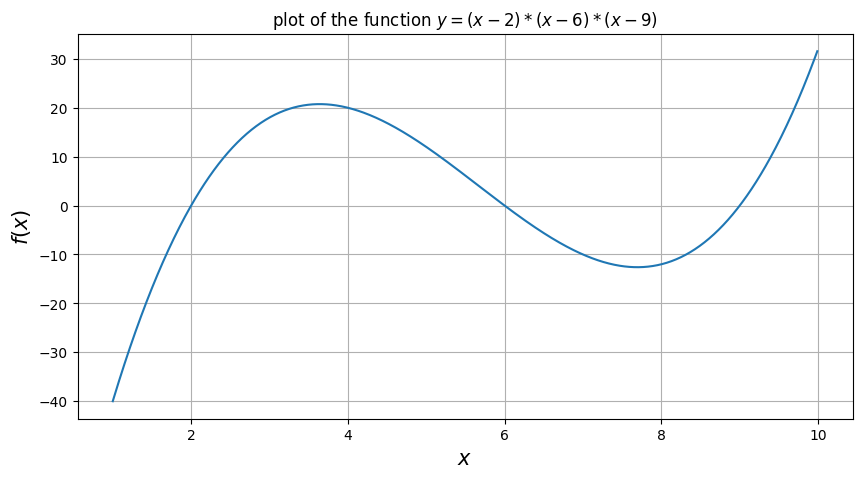

In [27]:
x = np.arange(1, 10, 0.01)
plt.figure(figsize = (10,5))
plt.plot(x, my_func(x))
plt.title(r'plot of the function $y = (x - 2)*(x - 6)*(x - 9)$')
plt.xlabel(r'$x$', fontsize = 15)
plt.ylabel(r'$f(x)$', fontsize = 15)
plt.grid(True)

The secant method

In [59]:
a = 7
b = 12
epsilon = 0.1

c = (a * my_func(b) - b * my_func(a)) / (my_func(b) - my_func(a))
while abs(b - a) >= epsilon:
    if my_func(c) * my_func(b) < 0:
        a = c
    else:
        b = c
    c = (a * my_func(b) - b * my_func(a)) / (my_func(b) - my_func(a)) 

x = (a + b) / 2
print(x)

KeyboardInterrupt: 

The method of simple iterations

In [35]:
def find_root(a, b, h, epsilon):
    x = a
    while x < b:
        root = iter_method(a, b, x, epsilon)
        if root != -1:
            return root
        x += h
    return -1

def iter_method(a, b, x_0, epsilon):
    x_prev = x_0
    x = x_0 - my_func(x_0)
    while abs(x - x_prev) >= epsilon:
        x_prev = x
        x -= my_func(x)
        if x < a or x > b:
            return -1
    return x

In [36]:
a = 7
b = 11
epsilon = 0.01

h = 1
while h > 0.0001:
    h /= 2
    res = find_root(a, b, h, epsilon)
    if res != -1:
        break

print(res)


9.0


The Newton's method

In [32]:
def find_root2(a, b, h, epsilon):
    x = a
    while x < b:
        root = newtons_method(a, b, x, epsilon)
        if root != -1:
            return root
        x += h
    return -1

def newtons_method(a, b, x_0, epsilon):
    x_prev = x_0
    x = x_0 - my_func(x_0) / der_my_func(x_0)
    while abs(x - x_prev) >= epsilon:
        x_prev = x
        x -= my_func(x) / der_my_func(x)
        if x < a or x > b:
            return -1
    return x


In [34]:
a = 3
b = 8
epsilon = 0.01

h = 1
while h > 0.00001:
    h /= 2
    res = find_root2(a, b, h, epsilon)
    if res != -1:
        break

print(res)


5.999999993522368


The Newton's method for systems

In [56]:
def norm(x):
    sum = 0
    for i in x:
        sum += i**2
    return math.sqrt(sum)

"""def find_root_sys(a, b, h, epsilon):
    x = a
    while x < b:
        root = newtons_method_sys(a, b, x, epsilon)
        if root != -1:
            return root
        x += h
    return -1"""

def newtons_method_sys(x_0, epsilon):
    x_prev = x_0
    x = x_0 - np.matmul(inv(Jacobian(x_0[0], x_0[1])), F(x_0[0], x_0[1]))
    count = 0
    while abs(norm(x - x_prev)) >= epsilon:
        x_prev = x
        x = x - np.matmul(inv(Jacobian(x[0], x[1])), F(x[0], x[1]))
        count += 1
        if(count > 500):
            return -1
    return x

x_0 = np.array([-1.5, 4.7]) #approximate solution
res = newtons_method_sys(x_0, 0.01)
print(res)

[-2.00000007  5.00000007]


[1, 2, 3, 4]


In [ ]:
n = np.log()
#использовать принцип сжимающих отображений